# Сборный проект 1. Предсказание популярности игр и игровых платформ <a class="tocSkip">

##### Вводная: <a class="tocSkip">
    
Представьте что вы Data Scientist в магазине "Bombastic Games" и продаете игры по всему миру. На носу 2017 год и вашей команде поступил запрос: необходимо предсказать что будет популярно в следующем году и спланировать рекламные компании. Также необходимо отработать принцип работы с данными, чтобы наработками можно было пользоваться и в следующих сезонах.
    
Для анализа вам предоставлены данные из открытых источников. Информация о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Собраны данные до 2016 года, но данные за последний год могут быть неполными.

Основные вопросы:    
Есть ли какие-либо закономерности, определяющие успешность игры и платформы?   
Можно ли составить портрет пользователя для каждого региона?

Кроме всего, руководство попросило вас проверить следующие продуктовые гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Цель проекта <a class="tocSkip">

    По представленным данным распланировать кампанию следующий год. Отработать принцип работы с данными.


### Описание данных <a class="tocSkip">

Название признака | Содержание 
---|:---
Name | Название игры
Platform | Платформа
Year_of_Release | Год выпуска
Genre | Жанр игры
NA_sales | Продажи в Северной Америке (миллионы проданных копий)
EU_sales | Продажи в Европе (миллионы проданных копий)
JP_sales | Продажи в Японии (миллионы проданных копий)
Other_sales | Продажи в других странах (миллионы проданных копий)
Critic_Score | Оценка критиков (максимум 100)
User_Score | Оценка пользователей (максимум 10)
Rating | Рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

*Данные за 2016 год могут быть неполными.

### План по выполнению проекта: <a class="tocSkip">

[Шаг 1.  Открытие файла с данными и изучение общей информации](#step1)

[Шаг 2. Подготовка данных](#step2)
- Исправление названий столбцов;
- Приведение данных к нужным типам;
- Обработка пропусков;
- Обработка аббревиатуры 'tbd' в столбцах с рейтингом.
- Расчет суммарных продаж во всех регионах.

[Шаг 3. Исследовательский анализ данных](#step3)
- Оценка количества игр в разные годы;
- Сравнение продаж по платформам;
- Выбор актуального периода для построения прогноза на 2017 год;
- Выбор потенциально прибыльных платформ;
- Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам. 
- Оценка влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы. 
- Соотнесение выводов с продажами игр на других платформах.
- Оценка общего распределения игр по жанрам. 

[Шаг 4. Составление портрета пользователя каждого региона](#step4)

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5); 
* Самые популярные жанры (топ-5). 
* Выявить влияние рейтинга ESRB на продажи в отдельном регионе.

[Шаг 5. Проверка гипотез](#step5)
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

[Шаг 6. Общий вывод и рекомендации](#step6)

## 0. Установка библиотек <a class="tocSkip">

In [1]:
#установим возможность сохранять состояние
%pip install dill

%pip install seaborn>=0.11 -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 81 kB 1.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import dill 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from scipy import stats as st

#библиотека warnings для работы с предупреждениями
import warnings
warnings.simplefilter("ignore")

## 1. Открытие файла с данными и изучение общей информации<a id='step1'></a>

In [3]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.duplicated().sum()

0

### Вывод

Для дальнейшего анализа была получена таблица из 11 столбцов и 16715 игр-строк. Названия всех столбцов соответствуют документации, однако написаны с заглавной буквы. Полных дубликатов нет. 

Первичный взгляд на данные позволил выявить следующие проблемы:

1. В данных большое количство пропущенных значений (в 6 столбцах), их можно обработать.
2. Названия столбцов можно привести к нижнему регистру.
3. Год выпуска `Year_of_Release` имеет тип float64, его можно привести к int.
4. `User_Score` определился как object, хотя должен быть float.

## 2. Подготовка данных<a id='step2'></a>

### Исправление названий столбцов

In [6]:
data.columns = data.columns.str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

`name`

In [7]:
#отобразим пропуски
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 пропуска возникают для одной консоли - Sega Genesis. Причем здесь же вознкают пропуски в столбце с жанром.  
Взглянем сколько всего учтено игр этой консоли:

In [8]:
#посчитаем по столбцу platform так как в нём нету пропоусков
data.query('platform == "GEN"').count()['platform']

29

Игр всего 29, поэтому значения лучше не удалять – заменим их имена на GEN_game_1 и 2, а жанры на `unknown`:

In [9]:
data.loc[659, 'name'] = 'GEN_game_1'
data.loc[14244, 'name'] = 'GEN_game_2'
data.loc[659, 'genre'] = 'unknown'
data.loc[14244, 'genre'] = 'unknown'

data[data['name'].isna()].count()['name']

0

Пропущенные значения могли возникнуть если названия игр и жанров были написаны иероглифами, либо в таблицу молги попасть платные дополнения к играм.

`year_of_release`

In [10]:
data.query('year_of_release.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [11]:
#доля пропущенных значений:
missing_part_year = (data.query('year_of_release.isna()').count()['platform'] / 
                    data.count()['platform'])

missing_part_year

0.01609332934489979

Пропуски появляются на разных платформах, играх и разных жанрах. Причины возникновения пропусков пока не ясны.

В некоторых названиях игр содержится год, однако если обрататься к поисковым источникам, он не соответствует реальному году выпуска (часто игра выпускается годом ранее). Поэтому частично восстановить год выпуска по названию не получится. 

Доля пропущенных значений – 1.6%, что кажется довольно малым значением.

Если пропущенных данных нам будет нехватать, можно будет попробовать распарсить информацию о дате выпуска в интернете.
А пока отфильтруем пропущенные значения:

In [12]:
data = data.query('year_of_release.isna() != True')

`critic_score`

In [13]:
data.query('critic_score.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [14]:
missing_part_critiq = (data.query('critic_score.isna()').count()['platform'] / 
                       data.count()['platform'])
missing_part_critiq

0.5145932141554177

In [15]:
data.corr()['critic_score']

year_of_release    0.011411
na_sales           0.240083
eu_sales           0.221276
jp_sales           0.153474
other_sales        0.198410
critic_score       1.000000
Name: critic_score, dtype: float64

Доля пропущенных значений 51% что довольно много, однако это вполне реальное значение – критики довольно часто пропускают различные непопулярные или старые игры. Поэтому пропущенные значения будем заменять на `unrated`:

In [16]:
data['critic_score'] = data['critic_score'].fillna('unrated')

data.query('critic_score.isna()').count()['platform']

0

`user_score`

In [17]:
data.query('user_score.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,unrated,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,unrated,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,unrated,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,unrated,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,unrated,NaN,NaN


In [18]:
missing_part_user_score = (data.query('user_score.isna()').count()['platform'] / 
                       data.count()['platform'])
missing_part_user_score

0.40173902468685396

Снова видим большую долю пропущенных значений – 40%, это значение также приближено к реальности – на многие игры довольно часто не собирается статистика. Поэтому пропущенные значения также будем заменять на `unrated`:

In [19]:
data['user_score'] = data['user_score'].fillna('unrated')

data.query('user_score.isna()').count()['platform']

0

`rating`

Для начала уточним, что рейтинг ESRB определяет рейтинги для компьютерных видеоигр в США и Канаде (https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board). Мы же имеем дело с играми, выпущенными по всему миру. Поэтому будем ожидать встретить значительную долю пропусков в этом столбце. 

In [20]:
data.query('rating.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,unrated,unrated,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,unrated,unrated,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,unrated,unrated,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,unrated,unrated,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,unrated,unrated,NaN


In [21]:
missing_part_rating = (data.query('rating.isna()').count()['platform'] / 
                       data.count()['platform'])
missing_part_rating

0.4060561838744984

Как и ожидалось, видим большую долю пропущенных значений – 41%. Пропущенные значения также будем заменять на `unrated`:

In [22]:
data['rating'] = data['rating'].fillna('unrated')

data.query('rating.isna()').count()['platform']

0

### Обработка аббревиатуры 'tbd' в столбцах с рейтингом

In [23]:
data[data['critic_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [24]:
data[data['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,unrated,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,unrated,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,unrated,tbd,E


In [25]:
data[data['rating'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Значение `tbd` встречается только в столбце `user_score`.  
Расшифруем значение "tbd" – To Be Determined (Ещё не определен). Чтобы гарантировать, что оценки точно отражают отзывы критиков о какой-либо игре, задается нижний порог количества оценок, пока этот порог не достигнут, игра имеет статус "tbd".

Поскольку рейтинг еще не определен, его можно указать как `unrated`:

In [26]:
data['user_score'].replace('tbd', 'unrated', inplace= True)

### Приведение данных к нужным типам

In [27]:
#приведем год к формату int
data['year_of_release'] = data['year_of_release'].astype('int')

`user_scores` сейчас имеет смешанный тип данных, поскольку значения были заменены на `unrated`. Будем внимательны с этим столбцом во время дальнейшей работы.

### Расчет суммарных продаж во всех регионах

In [28]:
data['summary_sales'] = (data['na_sales'] + 
                         data['eu_sales'] + 
                         data['jp_sales'] + 
                         data['other_sales'])
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,unrated,unrated,unrated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,unrated,unrated,unrated,31.38


### Вывод

На данном этапе мы подготовили данные для дальнейшего анализа.

**1.** Исправлены названия столбцов.


**2.** Обработаны пропуски в столбцах:
- **name**:  2 пропуска возникают для одной консоли - Sega Genesis.  значения были замены на GEN_game_1 и 2, а жанры на unknown.
Пропущенные значения могли возникнуть если названия игр и жанров были написаны иероглифами, также в таблицу молги случайно попасть платные дополнения к играм.

- **year_of_release**: Пропуски появляются на разных платформах, играх и разных жанрах. Причины возникновения пропусков пока не ясны. В некоторых названиях игр содержится год, однако если обрататься к поисковым источникам, он не соответствует реальному году выпуска (часто игра выпускается годом ранее). Поэтому частично восстановить год выпуска по названию не получится.
Доля пропущенных значений – 1.6%, поэтому пропущенные значения были отфильтрованы.

- **critic_score**: Доля пропущенных значений 51% что довольно много, однако это вполне реальное значение – критики довольно часто пропускают различные непопулярные или старые игры. Поэтому пропущенные значения 

- **user_score**: Доля пропущенных значений – 40%, это значение также приближено к реальности – на многие игры довольно часто не собирается статистика. Поэтому пропущенные значения также заменялись на `unrated`.

- **rating**: Поскольку рейтинг ESRB определяет рейтинги для компьютерных видеоигр в США и Канаде, мы обнаружили большую долю пропущенных значений – 41%. Пропущенные значения заменялись на `unrated`.


**3.**  Обработана аббревиатура "tbd" в столбцах с рейтингом.

"tbd" – To Be Determined (Ещё не определен). Чтобы гарантировать, что оценки точно отражают отзывы критиков о какой-либо игре, задается нижний порог количества оценок, пока этот порог не достигнут, игра имеет статус "tbd".
Поскольку рейтинг еще не определен, мы его указывали как `unrated`.

**4.** Данные приведены  к нужным типам.  
Год приведен к формату `int`. `user_scores` было решено оставить как смешанный тип данных.

**5.** Был проведен расчет суммарных продаж во всех регионах.

## 3. Исследовательский анализ данных<a id='step3'></a>

### Оценка количества игр в разные годы

Text(0.5, 0.98, 'Количество игр в год')

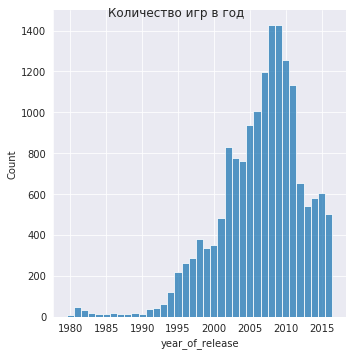

In [29]:
g = sns.displot(data, x="year_of_release", 
            kind='hist',
            discrete=True
            )

g.fig.suptitle('Количество игр в год')

Text(0.5, 1.0, 'Количество игр в год')

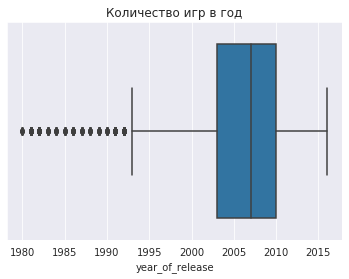

In [30]:
g = sns.boxplot(x=data["year_of_release"])
plt.title('Количество игр в год')

И на гистограмме и на диаграмме размаха видно, что игры начинают активно выпускаться только с 1993 года, пик количества игр приходится на 2008-2009 год, после чего значение идет на спад. 

Обозначим актуальный период как 1993 - 2016 года.

### Сравнение продаж по платформам;

Рассмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [32]:
#соберем топ платформ по продажам
top_sales_platforms = (data
                    .pivot_table(index='platform', values='summary_sales', aggfunc='sum')
                    .sort_values(by='summary_sales', ascending=False)
                    )
top_sales_platforms.head(10)

,summary_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


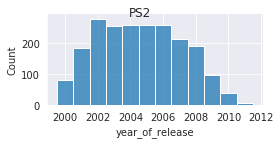

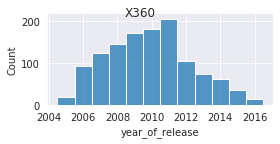

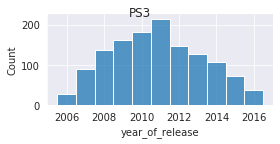

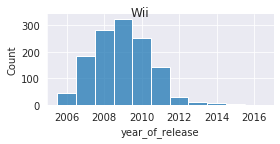

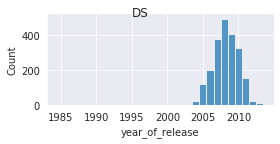

In [33]:
#функция которая будет строить гистограммы по переданной платформе
def build_hist(set_platform):
    
    data_for_platform = data.query('platform == @set_platform')

    g = sns.displot(data_for_platform,
            x= "year_of_release", 
            kind= 'hist',
            discrete= True,
            height= 2,          
            aspect= 2
            )

    g.fig.suptitle(f'{set_platform}')
    
#построим графики для топ 5 платформ  
for index in range (0, 5):
    build_hist(top_sales_platforms.index[index])

На гистограммах видно, что у PS2, PS3, XBOX 360 и DS основной стак игр выходит и активно продается в промежуток около 10 лет, у Wii промежуток оказался меньше - около 6 лет. Также зафиксируем что распределения стремятся к нормальному.

Примем, что характерный срок за который появляются новые и исчезают старые платформы – 10 лет.

### Выбор актуального периода для построения прогноза на 2017 год

При выборе актуального периода для построения прогноза на 2017 год можно поступить двумя способами:  
 1. Взять как можно больше данных за все время;  
 2. Ограничиться периодом в 10 лет.

Поскольку дальнейший анализ будет в основном фокусироваться на анализе платформ, а также из-за того, что для предсказания будущего спроса лучше всего использовать "живые" платформы, выберем период в последние 10 лет: данные за 2006 - 2016 год.

Если во время анализа нам будет нехватать данных по какому-либо признаку, можно будет рассмотреть более продолжительный период.

In [34]:
data = data.query('year_of_release >= 2006')

### Выбор потенциально прибыльных платформ

Рассмотрим какие платформы лидируют по продажам, растут по ним или падают, и выберем несколько потенциально прибыльных платформ.

Text(0.5, 0.98, 'Проданные игры на платформе')

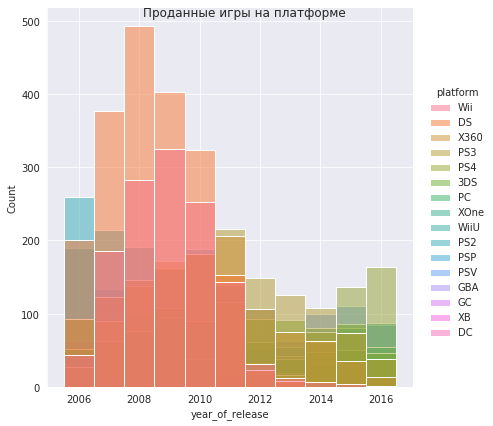

In [35]:
g = sns.displot(data,
            x= "year_of_release", 
            kind='hist',
            hue='platform',    
            discrete= True,
            height= 6,          
            aspect= 1
            )

g.fig.suptitle('Проданные игры на платформе')

На этом графике становится видно, что мы взяли слишком большой промежуток для анализа – сюда попадают платформы, которые имели большой успех в 2006 - 2010, однако сейчас непопулярны. Они будут мешать выявить актуальных лидеров по продажам.

Поэтому поставим более жесткий фильтр: 2013 - 2016

In [36]:
data = data.query('year_of_release >= 2013')

Text(0.5, 0.98, 'Проданные игры на платформе')

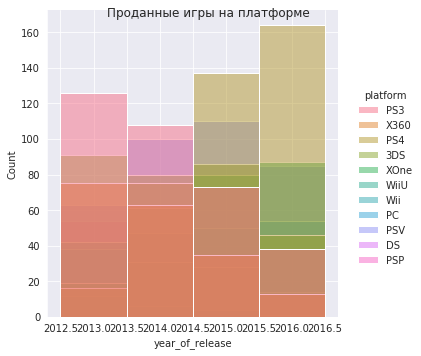

In [37]:
g = sns.displot(data,
            x= "year_of_release", 
            kind='hist',
            hue='platform',    
            discrete= True,
            height= 5,          
            aspect= 1
            )

g.fig.suptitle('Проданные игры на платформе')

In [38]:
#соберем таблицу по продажам платформ в год
platforms_actual = (data
                    .pivot_table(index='year_of_release', columns='platform', values='summary_sales', aggfunc='sum')
                                        )
platforms_actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Перед анализом ещё раз уточним, что одна из проблем данных в том, что данные за 2016 год неполные. 

Так как распределения ведут себя как нормальное, условимся что растущие платформы – это те платформы, у которых пик (максимальное значение) приходится на 2016 или 2015 год.

Выделим растущие платформы:

In [39]:
growing_platforms = []

for platform in platforms_actual.columns:
    if ((platforms_actual[f'{platform}'].max() == platforms_actual.loc[2016, f'{platform}']) or
        (platforms_actual[f'{platform}'].max() == platforms_actual.loc[2015, f'{platform}'])):
        growing_platforms.append(platform)

growing_platforms

['PS4', 'XOne']

И лидеров по продажам:

In [40]:
#для удобства транспонируем таблицу
platforms_actual_t = platforms_actual.transpose(copy= True)

platforms_actual_t.columns = ['2013', '2014', '2015', '2016']

#посчитаем общие продажи за выбранный период
platforms_actual_t['summary_sales'] = platforms_actual_t.sum(axis=1)

platforms_actual_t.sort_values(by='summary_sales', ascending=False)

,2013,2014,2015,2016,summary_sales
platform,,,,,
PS4,25.99,100.00,118.90,69.25,314.14
PS3,113.25,47.76,16.82,3.60,181.43
XOne,18.96,54.07,60.14,26.15,159.32
3DS,56.57,43.76,27.78,15.14,143.25
X360,88.58,34.74,11.96,1.52,136.80
WiiU,21.65,22.03,16.35,4.60,64.63
PC,12.38,13.28,8.52,5.25,39.43
PSV,10.59,11.90,6.25,4.25,32.99
Wii,8.59,3.75,1.14,0.18,13.66


Теперь становится видно, что у платформы **PS4** самые большие продажи за выбранный период, к тому же мы выяснили что они растут.  
К растущим платформам мы также отнесли **Xbox One**, которая занимает 3 место по объему продаж. Это две потенциально самые прибыльные платформы в 2017 году.

**PS3 и Xbox 360** – предыдущие версии платформ, занимают 2 и 4 место соответственно, однако у них продажи стремительно падают.

Также выделим **Nintendo 3DS, ПК и PS Vita**. Несмотря на то, что продажи у них падают, падение не такое стремительное и от них можно ожидать определенного уровня продаж в следующем году. 

**WiiU** на 6 месте по объему продаж, является самой рискованной для того чтобы вкладываться в её реализацию и рекламную кампанию: видим резкое падение её продаж в 2016 году по сравнению с поведением остальных платформ.

Продажи оставшихся платформ – **Wii, PSP и DS** уже совсем сошли или сходят на нет.	

### Диаграмма размаха по глобальным продажам игр в разбивке по платформам. 

Text(0.5, 0.98, 'Продажи на платформе')

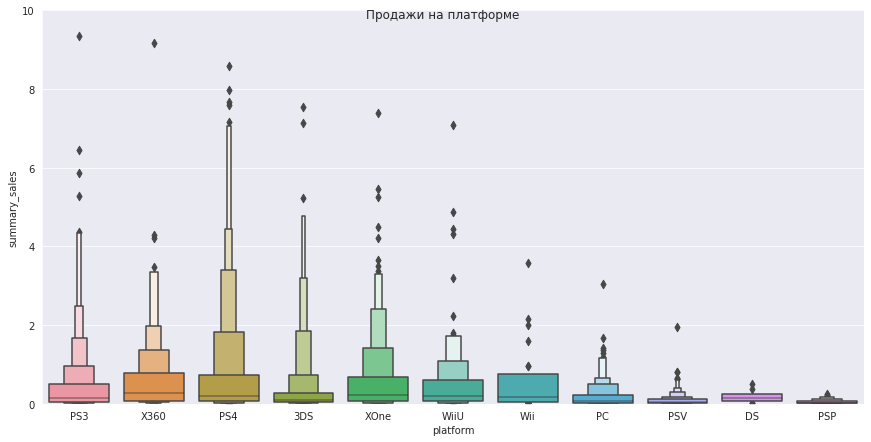

In [41]:
g = sns.catplot(x="platform", 
                y="summary_sales", 
                kind="boxen",
                data=data,
                height= 6,          
                aspect= 2)

g.set(ylim=(0, 10))
g.fig.suptitle('Продажи на платформе')

График отображает объемы продаж и в целом визуализирует результаты из предыдущего пункта анализа.

Можно обратить внимание на интересное распределение продаж у платформы Wii – относительно широкий ящик говорит о большой диспресии продаж игр. 

Также отметим распределения PSVita, и в некоторой степени 3DS и PC. На платформы выходят игры в основном с одинаковыми продажами, что говорит о стабильности платформы. (PSP также стабильно, однако объемы продаж очень маленькие)

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Будем оценивать влияние оценок критиков для платформы PS4.

In [42]:
#выберем платформу и игры с рейтингом
ps4_data = data.query('(platform == "PS4") and (user_score != "unrated") and (critic_score != "unrated")')
ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


In [43]:
ps4_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 42 to 16530
Data columns (total 12 columns):
name               249 non-null object
platform           249 non-null object
year_of_release    249 non-null int64
genre              249 non-null object
na_sales           249 non-null float64
eu_sales           249 non-null float64
jp_sales           249 non-null float64
other_sales        249 non-null float64
critic_score       249 non-null object
user_score         249 non-null object
rating             249 non-null object
summary_sales      249 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 25.3+ KB


осталось 249 игр, 
оценки приведем к числовому формату:

In [44]:
ps4_data['critic_score'] = ps4_data['critic_score'].astype('float64')
ps4_data['user_score'] = ps4_data['user_score'].astype('float64')

In [45]:
ps4_data.corr()['summary_sales']

year_of_release   -0.234400
na_sales           0.893807
eu_sales           0.951656
jp_sales           0.592214
other_sales        0.997798
critic_score       0.405895
user_score        -0.033625
summary_sales      1.000000
Name: summary_sales, dtype: float64

Наблюдаем корреляцию продаж и оценок критиков на уровне 0.4, корреляции оценок пользователей и продаж не обнаружено.
Построим диаграммы рассеяния:

Text(0.5, 1.0, 'Зависимость продаж от оценки критиков')

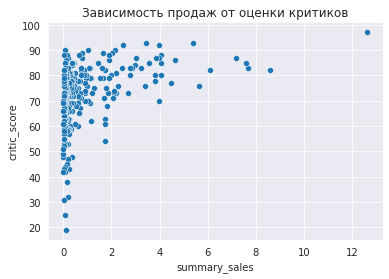

In [46]:
g = sns.scatterplot(data=ps4_data, x="summary_sales", y="critic_score")

plt.title('Зависимость продаж от оценки критиков')

Видно положительную зависимость, причем чем больше у игры продаж, тем выше оценка критиков (например, если у игры суммарные продажи больше 2 миллионов, то оценки критиков не падают ниже 70). 

Рецензенты обычно имеют возможность поиграть в игру раньше чем обычные пользователи, таким образом на релизе оценка критиков значительно влияет на решение о покупке.

Text(0.5, 1.0, 'Зависимость продаж от пользовательской оценки')

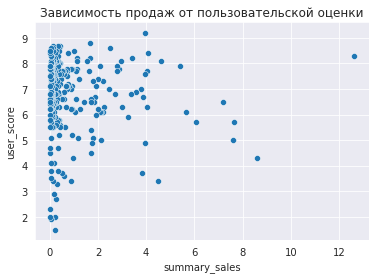

In [47]:
g = sns.scatterplot(data=ps4_data, x="summary_sales", y="user_score")

plt.title('Зависимость продаж от пользовательской оценки')

Здесь какой-либо связи не просматривается. Видим что большая часть игр и оценок смещена к оценкам 6-8 и продажам около 0.

Скорее всего это объясняется тем, что в основном игры покупаются на релизе и решение о покупке делается до того как игре вынесена оценка.

### Соотнесение выводов с продажами игр на других платформах.

Взглянем на распределение по всем платформам:

In [48]:
#подготовим таблицы
scored_data = data.query('(user_score != "unrated") and (critic_score != "unrated")')
scored_data['critic_score'] = scored_data['critic_score'].astype('float64')
scored_data['user_score'] = scored_data['user_score'].astype('float64')
scored_data.corr()['summary_sales']

year_of_release   -0.135866
na_sales           0.910940
eu_sales           0.933210
jp_sales           0.379603
other_sales        0.944049
critic_score       0.311692
user_score        -0.004064
summary_sales      1.000000
Name: summary_sales, dtype: float64

Text(0.5, 1.0, 'Зависимость продаж от оценки критиков')

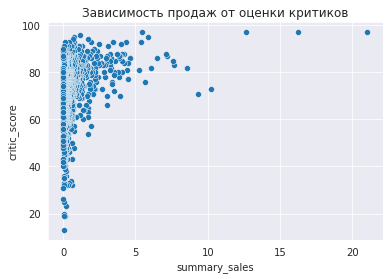

In [49]:
g = sns.scatterplot(data=scored_data, x="summary_sales", y="critic_score")

plt.title('Зависимость продаж от оценки критиков')

Text(0.5, 1.0, 'Зависимость продаж от пользовательской оценки')

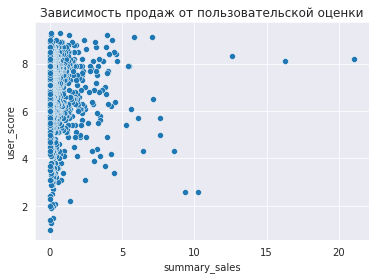

In [50]:
g = sns.scatterplot(data=scored_data, x="summary_sales", y="user_score")

plt.title('Зависимость продаж от пользовательской оценки')

Для всех оцененных игр взятых вместе ситуация схожая – есть зависимость для оценок критиков, а для оценок игроков зависимости с продажами нет.

### Общее распределение игр по жанрам. 

Text(0.5, 0.98, 'Продажи по жанрам')

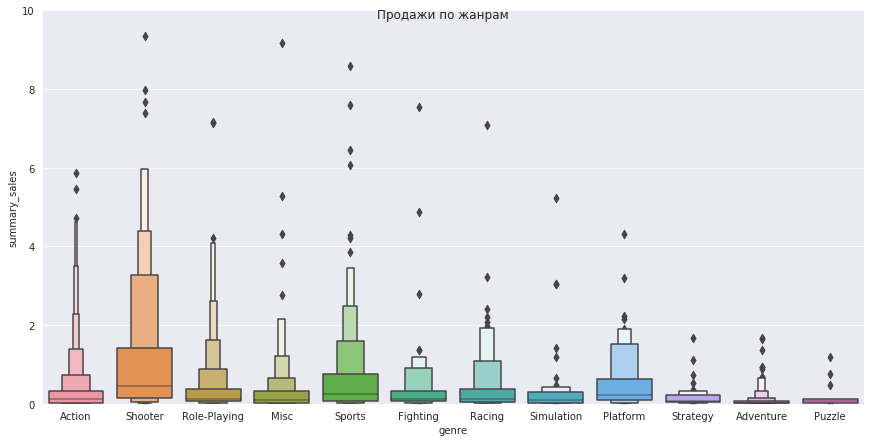

In [51]:
g = sns.catplot(x="genre", 
                y="summary_sales", 
                kind="boxen",
                data=data,
                height= 6,          
                aspect= 2)

g.set(ylim=(0, 10))
g.fig.suptitle('Продажи по жанрам')

Самые прибыльные жанры: Shooter, Sports и Platform.  
Жанр Action имеет в среднем не очень большие продажи, однако имеет самые продаваемые игры по выборке (одна из них достигает более 20 млн. проданных копий). ## можно убрать ylim и увидеть график полностью

Продажи жанров Strategy, Adventure и Puzzle, как видим, не превышают 2 млн. проданных копий.  

### Вывод

На данном шаге был проведен исследовательский анализ данных.

**3.1.**  Дана оценка количества игр в разные годы.
После визуализации данных стало видно, что игры начинают активно выпускаться только с 1993 года, пик количества игр приходится на 2008-2009 год, после чего значения идут на спад. На данном этапе мы обозначили актуальный период выпуска игр как 1993 - 2016 года.

**3.2.**  Проведено сравнение продаж по платформам. 
После того, как мы построили графики для топ 5 платформ по продажам, мы наблюдали что у PS2, PS3, XBOX 360 и DS основной стак игр выходит и активно продается в промежуток около 10 лет, у Wii промежуток оказался меньше - около 6 лет. 
Также распределения были схожи с нормальным.

Таким образом было установлено, что характерный срок за который появляются новые и исчезают старые платформы – 10 лет.

**3.3.**  Был выбран актуальный период для построения прогноза на 2017 год.
Поскольку дальнейший анализ будет в основном фокусироваться на анализе платформ, а также из-за того, что для предсказания будущего спроса лучше всего использовать "живые" платформы, мы выбрали период в последние 10 лет: данные за 2006 - 2016 год.

Если во время дальнейшего анализа нам будет нехватать данных по какому-либо признаку, можно будет рассмотреть более продолжительный период.

**3.4.**  Отобраны потенциально прибыльные платформы.  
После построения графика для всех платформ стало видно, что мы взяли слишком большой промежуток для анализа – мы охватывали платформы, которые имели большой успех в 2006 - 2010, однако сейчас непопулярны. 
Поэтому мы установили более жесткий фильтр: 2013 - 2016г.

После анализ данных мы выявили, что у платформы **PS4** самые большие продажи за выбранный период, к тому же мы выяснили что они растут. К растущим платформам мы также отнесли **Xbox One**, которая занимает 3 место по объему продаж. Это две потенциально самые прибыльные платформы в 2017 году.

**PS3 и Xbox 360** – предыдущие версии платформ, занимают 2 и 4 место соответственно, однако у них продажи стремительно падают.

Также выделим **Nintendo 3DS, ПК и PS Vita**. Несмотря на то, что продажи у них падают, падение не такое стремительное и от них можно ожидать определенного уровня продаж в следующем году.

**WiiU** на 6 месте по объему продаж, является самой рискованной для того чтобы вкладываться в её реализацию и рекламную кампанию: видим резкое падение её продаж в 2016 году по сравнению с поведением остальных платформ.

Продажи оставшихся платформ – Wii, PSP и DS уже совсем сошли или сходят на нет.

**3.5.** Построили диаграмму размаха по глобальным продажам игр в разбивке по платформам.

Диаграмма размаха отображала объемы продаж и в визуализировала результаты из предыдущего пункта анализа.

Мы обратили внимание на интересное распределение продаж у платформы Wii – относительно широкий ящик говорит о большой диспресии продаж игр.
Также отметили распределения PSVita, и в некоторой степени 3DS и PC. На платформы выходят игры в основном с одинаковыми продажами, что говорит о стабильности платформы. (PSP также стабильно, однако объемы продаж очень маленькие)

**3.6.**  Оценили влияние отзывов пользователей и критиков на продажи внутри платформы PS4.

Была найдена положительная корреляция продаж и оценок критиков на уровне 0.4, причем чем больше у игры продаж, тем выше оценка критиков (например, если у игры суммарные продажи больше 2 миллионов, то оценки критиков не падают ниже 70).
Рецензенты обычно имеют возможность поиграть в игру раньше чем обычные пользователи, таким образом на релизе оценка критиков значительно влияет на решение о покупке.

Корреляции оценок пользователей и продаж не обнаружено. Большая часть игр и оценок смещена к оценкам 6-8 и продажам около 0.
Скорее всего это объясняется тем, что в основном игры покупаются на релизе и решение о покупке делается до того как игре вынесена пользовательская оценка.

**3.7.**  Соотнесли выводы с продажами игр на других платформах.

После анализа распределения продаж по всем платформам мы выявили, что для всех игр взятых вместе ситуация схожая – есть зависимость для оценок критиков, а для оценок игроков зависимости с продажами нет.

**3.8.**  Рассмотрели общее распределение игр по жанрам.

Самые прибыльные жанры: Shooter, Sports и Platform.
Жанр Action имеет в среднем не очень большие продажи, однако имеет самые продаваемые игры по выборке (одна из них достигает более 20 млн. проданных копий). 

Продажи жанров Strategy, Adventure и Puzzle, как оказалось, не превышают 2 млн. проданных копий за выбранный период.

## 4. Составление портрета пользователя каждого региона<a id='step4'></a>

In [52]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,unrated,unrated,unrated,14.63


### Самые популярные платформы (топ-5)

**NA**

In [53]:
(data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


В Северной Америке самые высокие позиции с небольшим отрывом друг от друга занимают консоли последнего поколения PS4 и Xbox One (108 и 93 млн.).   
Nintendo 3DS находится на последней позиции с 38 млн проданных копий.

**EU**

In [54]:
(data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


В Европе с большим отрывом лидирует PS4 с 141 млн проданных игр. На втором месте PS3, и только после нее идут консоли Xbox.

Nintendo 3DS опять закрывает топ 5. 

**JP**

In [55]:
(data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


В Японии же ситуация совершенно другая. Здесь лидируют игры для Нинтендо 3DS c 67 млн проданных игр. На втором месте игры для PS3 – вполне возможно игроки еще не успели обновиться до следующего поколения консоли, которая находится на 4 месте. 

На 3 и 5 местах теперь расположились ещё 2 портативные консоли – PSVita с 18 млн и WiiU с 10 млн проданных копий.

Таким образом в целом PS лидирует на всех рынках, но особенно ярко это проявляется в Европе.  
В Японии же отдают предпочтение играм для портативных консолей.

### Самые популярные жанры (топ-5)

**NA**

In [56]:
(data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


В Америке больше всего любят жанры Action (126 млн.) и Shooter (109 млн.). 

**EU**

In [57]:
(data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


В Европе игроки любят практически те же жанры что и в Северной Америке – топы различаются только последней позицией, где жанр Misc заменился на Racing.

**JP**

In [58]:
(data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


Япония опять сильно отличается от западных стран: здесь на вершину топа поднимается жанр Role-Playing с 51 млн и жанр Action с 40 млн. на втором месте. Остальные жанры менее популярны: Misc 9.20млн., Fighting 7.65млн., Shooter 6.61млн. –
в шутеры на портативной консоли не поиграть.

### Влияние рейтинга ESRB на продажи в отдельном регионе.

In [59]:
#отфильтруем игры без рейтинга
rated_games = data.query('rating != "unrated"')

rated_games['rating'].unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

Всего представлено 4 градации рейтинга ESRB:

E («Everyone») — «Для всех»  
E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»  
T («Teen») — «Подросткам»  
M («Mature») — «Для взрослых»  

In [60]:
rated_games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,summary_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [61]:
#сгруппируем данные для визуализации
rated_games = pd.melt(rated_games, id_vars=['rating'], value_vars=['na_sales', 'eu_sales', 'jp_sales'],
                         var_name='region', value_name='region_sales')
rated_games.head()

,rating,region,region_sales
0,M,na_sales,7.02
1,M,na_sales,9.66
2,M,na_sales,3.96
3,M,na_sales,6.73
4,M,na_sales,4.10


Text(0.5, 1, 'Зависимость продаж в регионе от рейтинга ESRB')

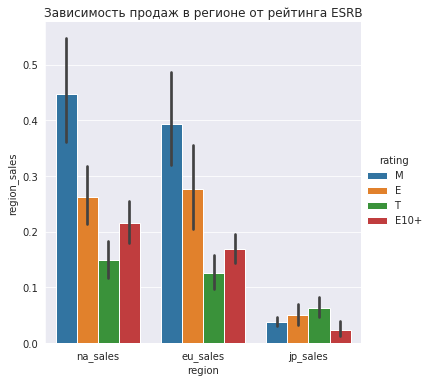

In [62]:
g = sns.catplot(x="region", 
                y="region_sales", 
                hue='rating', 
                data=rated_games, 
                kind='bar'
               )

plt.title('Зависимость продаж в регионе от рейтинга ESRB')

После группировки и визуализации данных становится видно, что NA и EU регионы по влиянию рейтинга ESRB очень похожи между собой – идентичные распределения, только у EU меньше продаж в целом. И в NA и в EU самые продающиеся игры имеют рейтинг M («Mature»).
Далее идут игры для всех, на третьем месте по продажам игры 10+, а на последнем – игры для подростков. 
Вероятно, такая картина связана с тем, что во-первых платящая аудитория это взрослые (для них делаются игры М), которые могут покупать игры и для своих детей (с рейтингом E). Во-вторых подростковая аудитория слишком мала по объему чтобы выпускать под неё большие проекты.

Перейдем к продажам в Японском секторе. Здесь ситуация совершенно иная – лидируют игры для подростков и для людей всех возрастов.
Это можно попробовать объяснить политикой государства по отношению к "mature content", а также популярностью портативных консолей, на которые в основном выходят игры только определенных жанров. 

### Вывод

На данном этапе анлиза мы пытались составить портрет пользователя каждого региона.


**4.1**  Самые популярные платформы (топ-5)
- NA: В Северной Америке самые высокие позиции с небольшим отрывом друг от друга занимают консоли последнего поколения PS4 и Xbox One (108 и 93 млн.). Nintendo 3DS находится на последней позиции с 38 млн проданных копий.
- EU: В Европе с большим отрывом лидирует PS4 с 141 млн проданных игр. На втором месте PS3, и только после нее идут консоли Xbox.
Nintendo 3DS опять закрывает топ 5.
- JP: В Японии же ситуация совершенно другая. Здесь лидируют игры для Нинтендо 3DS c 67 млн проданных игр. На втором месте игры для PS3 – вполне возможно игроки еще не успели обновиться до следующего поколения консоли, которая находится на 4 месте. На 3 и 5 местах теперь расположились ещё 2 портативные консоли – PSVita с 18 млн и WiiU с 10 млн проданных копий.

В целом PS лидирует на всех рынках, но особенно ярко это проявляется в Европе. В Японии же отдают предпочтение играм для портативных консолей.


**4.2**  Самые популярные жанры (топ-5)
- NA: В Америке больше всего любят жанры Action (126 млн.) и Shooter (109 млн.). 
- EU: В Европе игроки любят практически те же жанры что и в Северной Америке – топы различаются только последней позицией, где жанр Misc заменился на Racing.
- JP: Япония опять сильно отличается от западных стран. Здесь на вершину топа поднимается жанр Role-Playing с 51 млн и жанр Action с 40 млн. на втором месте. Остальные жанры менее популярны: Misc 9.20млн., Fighting 7.65млн., Shooter 6.61млн.

**4.3**  Влияние рейтинга ESRB на продажи в отдельном регионе.

Всего было представлено 4 градации рейтинга ESRB:

• E («Everyone») — «Для всех»  
• E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»  
• T («Teen») — «Подросткам»  
• M («Mature») — «Для взрослых»

После группировки и визуализации данных стало видно, что NA и EU регионы по влиянию рейтинга ESRB очень похожи между собой – идентичные распределения, только у EU меньше продаж в целом. И в NA и в EU самые продающиеся игры имеют рейтинг M («Mature»). Далее идут игры для всех, на третьем месте по продажам игры 10+, а на последнем – игры для подростков. Вероятно, такая картина связана с тем, что во-первых платящая аудитория это взрослые (для них делаются игры М), которые могут покупать игры и для своих детей (с рейтингом E). Во-вторых подростковая аудитория слишком мала по объему чтобы выпускать под неё большие проекты.

Перейдем к продажам в Японском секторе. Здесь ситуация совершенно иная – лидируют игры для подростков и для людей всех возрастов. Это можно попробовать объяснить политикой государства по отношению к "mature content", а также популярностью портативных консолей, на которые в основном выходят игры только определенных жанров.

In [63]:
#ячейка для работы с состоянием
#dill.dump_session('4th_project_env.db')
#dill.load_session('4th_project_env.db')

## 5. Проверка гипотез<a id='step5'></a>

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем нулевую \\(H_0\\) и альтернативную гипотезу \\(H_1\\):

\\(H_0\\): Средние пользовательские рейтинги платформ Xbox One и PC равны.

\\(H_1\\): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [64]:
user_rated_games = data.query('user_score != "unrated"')

user_rated_games['user_score'] = user_rated_games['user_score'].astype('float64')
user_rated_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 16 to 16692
Data columns (total 12 columns):
name               1192 non-null object
platform           1192 non-null object
year_of_release    1192 non-null int64
genre              1192 non-null object
na_sales           1192 non-null float64
eu_sales           1192 non-null float64
jp_sales           1192 non-null float64
other_sales        1192 non-null float64
critic_score       1192 non-null object
user_score         1192 non-null float64
rating             1192 non-null object
summary_sales      1192 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 121.1+ KB


#### Выбор метода

Проверим распределение признаков в каждой выборке

In [65]:
#выберем нужные платформы
user_r_pc_xbox = user_rated_games.query('(platform == "XOne") or (platform == "PC")')

Text(0.5, 1, 'Нормализованные пользовательские оценки XOne и PC')

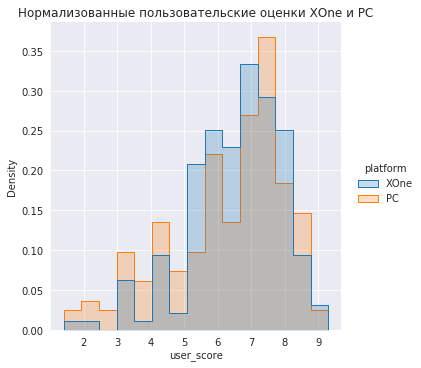

In [66]:
#построем нормализованные гистограммы
g = sns.displot(user_r_pc_xbox, 
                x="user_score",  
                hue="platform",
                stat="density", 
                element="step", 
                common_norm=False 
               )

plt.title('Нормализованные пользовательские оценки XOne и PC')

Распределения похожи на нормальные, со смещением вправо. 

Для того, чтобы сравнить средние двух генеральных совокупностей будем использовать Т-критерией Стьюдента.

Посчитаем среднее и дисперсию:

**PC**

In [67]:
print('Среднее: ', user_rated_games.query('platform == "PC"')['user_score'].mean())
print('Дисперсия: ', user_rated_games.query('platform == "PC"')['user_score'].std() **2)

Среднее:  6.2696774193548395
Дисперсия:  3.0358927524088815


**XOne**

In [68]:
print('Среднее: ', user_rated_games.query('platform == "XOne"')['user_score'].mean())
print('Дисперсия: ', user_rated_games.query('platform == "XOne"')['user_score'].std() **2)

Среднее:  6.521428571428572
Дисперсия:  1.9069968429360693


#### Применение Т-критерия Стьюдента
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем применять метод scipy.stats.ttest_ind(array1, array2, equal_var).

equal_var — параметр, задающий считать ли равными дисперсии выборок, установим как `False`, поскольку дисперсии не равны.

In [69]:
sample_1 = user_rated_games.query('platform == "XOne"')['user_score']
sample_2 = user_rated_games.query('platform == "PC"')['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Согласно т-тесту отвергнуть нулевую гипотезу не удалось.

Таким образом остается принятой гипотеза:
\\(H_0\\): Средние пользовательские рейтинги платформ Xbox One и PC равны.

Обычно содержание игр гораздо больше зависит от того, что туда закладывают разработчики, чем от платформы на которой вышла эта игра.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформируем нулевую \\(H_0\\) и альтернативную гипотезу \\(H_1\\):

\\(H_0\\): Средние пользовательские рейтинги жанров Action и Sports равны.

\\(H_1\\): Средние пользовательские рейтинги жанров Action и Sports различаются.

#### Выбор метода

Проверим распределение признаков в каждой выборке

Text(0.5, 1, 'Нормализованные пользовательские оценки жарнов Action и Sports')

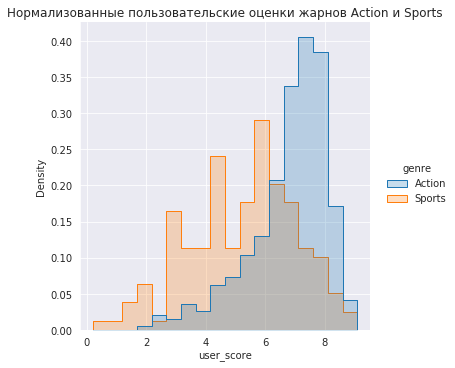

In [70]:
#выберем нужные жанры
user_r_AS = user_rated_games.query('(genre == "Action") or (genre == "Sports")')

#построем нормализованные гистограммы
g = sns.displot(user_r_AS, 
                x="user_score",  
                hue="genre",
                stat="density", 
                element="step", 
                common_norm=False 
               )

plt.title('Нормализованные пользовательские оценки жарнов Action и Sports')

Оба распределения схожи с нормальным, однако жанр Sport имеет более плоское распределение, оценки жанра Action имеют сдвиг вправо и сильнее сгруппированы возле среднего. 

Для того, чтобы сравнить средние двух генеральных совокупностей будем использовать Т-критерией Стьюдента.

Посчитаем среднее и дисперсию:

**Action**

In [71]:
print('Среднее: ', user_rated_games.query('genre == "Action"')['user_score'].mean())
print('Дисперсия: ', user_rated_games.query('genre == "Action"')['user_score'].std() **2)

Среднее:  6.837532133676092
Дисперсия:  1.7693609042482703


**Sports**

In [72]:
print('Среднее: ', user_rated_games.query('genre == "Sports"')['user_score'].mean())
print('Дисперсия: ', user_rated_games.query('genre == "Sports"')['user_score'].std() **2)

Среднее:  5.238124999999999
Дисперсия:  3.180612814465409


#### Применение Т-критерия Стьюдента
Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем применять метод scipy.stats.ttest_ind(array1, array2, equal_var).

equal_var — параметр, задающий считать ли равными дисперсии выборок, установим как `False`, поскольку дисперсии не равны.

In [73]:
sample_1 = user_rated_games.query('genre == "Sports"')['user_score']
sample_2 = user_rated_games.query('genre == "Action"')['user_score']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2, 
    equal_var = False
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Согласно т-тесту отвергаем нулевую гипотезу.  
Р-значение очень мало, поэтому вероятность того, что мы получили наблюдаемую разницу средних случайно, крайне мала.  
Таким образом принимаем
\\(H_1\\): Средние пользовательские рейтинги жанров Action и Sports различаются.

Согласно данным по нашей выборке, жанр Action в среднем получает более высокие оценки чем жанр Sports – у жанра Action средняя оценка 6.8, что больше чем у жанра Sports со средним значением 5.2. 

### Вывод

На данном шаге мы проверяли следующие продуктовые гипотезы:

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сначала мы сформировали нулевую и альтернативную гипотезу:
<br>\\(H_0\\): Средние пользовательские рейтинги платформ Xbox One и PC равны.
<br>\\(H_1\\): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Далее проверили распределение признаков в каждой выборке построив нормализованные гистограммы.
Распределения похожи на нормальные, со смещением вправо.

Для того, чтобы сравнить средние двух генеральных совокупностей мы использовали Т-критерией Стьюдента.
После расчета среднего и дисперсии был проведен т-тест.

Согласно т-тесту отвергнуть нулевую гипотезу не удалось. (p-значение: 0.15)
Таким образом остается принятой гипотеза: \\(H_0\\): Средние пользовательские рейтинги платформ Xbox One и PC равны.

Обычно содержание игр гораздо больше зависит от того, что туда закладывают разработчики, чем от платформы на которой вышла эта игра.

**5.2  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

На данном этапе мы сформировали следующие статистические гипотезы:
<br>\\(H_0\\): Средние пользовательские рейтинги жанров Action и Sports равны.
<br>\\(H_1\\): Средние пользовательские рейтинги жанров Action и Sports различаются.

После небольшой обработки данных мы проверили распределение – оба распределения схожи с нормальным, однако жанр Sport имеет более плоское распределение, оценки жанра Action имеют сдвиг вправо и сильнее сгруппированы возле среднего.

После применения Т-критерия Стьюдента мы получили \\(p =  1.45e-20\\)

Р-значение очень мало, поэтому вероятность того, что мы получили наблюдаемую разницу средних случайно, крайне мала.
Таким образом принимаем \\(H_1\\): Средние пользовательские рейтинги жанров Action и Sports различаются.

Отметим, что в нашей выборке жанр Action в среднем получает более высокие оценки чем жанр Sports – у жанра Action средняя оценка 6.8, что больше чем у жанра Sports со средним значением 5.2.


## 6. Общий вывод<a id='step6'></a>

### 1.
Мы обработали и проанализировали информацию о таблице из 11 столбцов и 16715 игр-строк. В процессе работы были решены следующие проблемы:

### 2. 

**2.1.** Исправлены названия столбцов.


**2.2.** Обработаны пропуски в столбцах:
- **name**:  2 пропуска возникают для одной консоли - Sega Genesis.  значения были замены на GEN_game_1 и 2, а жанры на unknown.
Пропущенные значения могли возникнуть если названия игр и жанров были написаны иероглифами, также в таблицу молги случайно попасть платные дополнения к играм.

- **year_of_release**: Пропуски появляются на разных платформах, играх и разных жанрах. Причины возникновения пропусков пока не ясны. В некоторых названиях игр содержится год, однако если обрататься к поисковым источникам, он не соответствует реальному году выпуска (часто игра выпускается годом ранее). Поэтому частично восстановить год выпуска по названию не получится.
Доля пропущенных значений – 1.6%, поэтому пропущенные значения были отфильтрованы.

- **critic_score**: Доля пропущенных значений 51% что довольно много, однако это вполне реальное значение – критики довольно часто пропускают различные непопулярные или старые игры. Поэтому пропущенные значения 

- **user_score**: Доля пропущенных значений – 40%, это значение также приближено к реальности – на многие игры довольно часто не собирается статистика. Поэтому пропущенные значения также заменялись на `unrated`.

- **rating**: Поскольку рейтинг ESRB определяет рейтинги для компьютерных видеоигр в США и Канаде, мы обнаружили большую долю пропущенных значений – 41%. Пропущенные значения заменялись на `unrated`.


**2.3.**  Обработана аббревиатура "tbd" в столбцах с рейтингом.

"tbd" – To Be Determined (Ещё не определен). Чтобы гарантировать, что оценки точно отражают отзывы критиков о какой-либо игре, задается нижний порог количества оценок, пока этот порог не достигнут, игра имеет статус "tbd".
Поскольку рейтинг еще не определен, мы его указывали как `unrated`.

**2.4.** Данные приведены  к нужным типам.  
Год приведен к формату `int`. `user_scores` было решено оставить как смешанный тип данных.

**2.5.** Был проведен расчет суммарных продаж во всех регионах.

### 3. 
Проведен исследовательский анализ данных.

**3.1.**  Дана оценка количества игр в разные годы.
После визуализации данных стало видно, что игры начинают активно выпускаться только с 1993 года, пик количества игр приходится на 2008-2009 год, после чего значения идут на спад. На данном этапе мы обозначили актуальный период выпуска игр как 1993 - 2016 года.

**3.2.**  Проведено сравнение продаж по платформам. 
После того, как мы построили графики для топ 5 платформ по продажам, мы наблюдали что у PS2, PS3, XBOX 360 и DS основной стак игр выходит и активно продается в промежуток около 10 лет, у Wii промежуток оказался меньше - около 6 лет. 
Также распределения были схожи с нормальным.

Таким образом было установлено, что характерный срок за который появляются новые и исчезают старые платформы – 10 лет.

**3.3.**  Был выбран актуальный период для построения прогноза на 2017 год.
Поскольку дальнейший анализ будет в основном фокусироваться на анализе платформ, а также из-за того, что для предсказания будущего спроса лучше всего использовать "живые" платформы, мы выбрали период в последние 10 лет: данные за 2006 - 2016 год.

Если во время дальнейшего анализа нам будет нехватать данных по какому-либо признаку, можно будет рассмотреть более продолжительный период.

**3.4.**  Отобраны потенциально прибыльные платформы.  
После построения графика для всех платформ стало видно, что мы взяли слишком большой промежуток для анализа – мы охватывали платформы, которые имели большой успех в 2006 - 2010, однако сейчас непопулярны. 
Поэтому мы установили более жесткий фильтр: 2013 - 2016г.

После анализа данных мы выявили, что у платформы **PS4** самые большие продажи за выбранный период, к тому же мы выяснили что они растут. К растущим платформам мы также отнесли **Xbox One**, которая занимает 3 место по объему продаж. Это две потенциально самые прибыльные платформы в 2017 году.

**PS3 и Xbox 360** – предыдущие версии платформ, занимают 2 и 4 место соответственно, однако у них продажи стремительно падают.

Также выделим **Nintendo 3DS, ПК и PS Vita**. Несмотря на то, что продажи у них падают, падение не такое стремительное и от них можно ожидать определенного уровня продаж в следующем году.

**WiiU** на 6 месте по объему продаж, является самой рискованной для того чтобы вкладываться в её реализацию и рекламную кампанию: видим резкое падение её продаж в 2016 году по сравнению с поведением остальных платформ.

Продажи оставшихся платформ – Wii, PSP и DS уже совсем сошли или сходят на нет.

**3.5.** Построили диаграмму размаха по глобальным продажам игр в разбивке по платформам.

Диаграмма размаха отображала объемы продаж и в визуализировала результаты из предыдущего пункта анализа.

Мы обратили внимание на интересное распределение продаж у платформы Wii – относительно широкий ящик говорит о большой диспресии продаж игр.
Также отметили распределения PSVita, и в некоторой степени 3DS и PC. На платформы выходят игры в основном с одинаковыми продажами, что говорит о стабильности платформы. (PSP также стабильно, однако объемы продаж очень маленькие)

**3.6.**  Оценили влияние отзывов пользователей и критиков на продажи внутри платформы PS4.

Была найдена положительная корреляция продаж и оценок критиков на уровне 0.4, причем чем больше у игры продаж, тем выше оценка критиков (например, если у игры суммарные продажи больше 2 миллионов, то оценки критиков не падают ниже 70).
Рецензенты обычно имеют возможность поиграть в игру раньше чем обычные пользователи, таким образом на релизе оценка критиков значительно влияет на решение о покупке.

Корреляции оценок пользователей и продаж не обнаружено. Большая часть игр и оценок смещена к оценкам 6-8 и продажам около 0.
Скорее всего это объясняется тем, что в основном игры покупаются на релизе и решение о покупке делается до того как игре вынесена пользовательская оценка.

**3.7.**  Соотнесли выводы с продажами игр на других платформах.

После анализа распределения продаж по всем платформам мы выявили, что для всех игр взятых вместе ситуация схожая – есть зависимость для оценок критиков, а для оценок игроков зависимости с продажами нет.

**3.8.**  Рассмотрели общее распределение игр по жанрам.

Самые прибыльные жанры: Shooter, Sports и Platform.
Жанр Action имеет в среднем не очень большие продажи, однако имеет самые продаваемые игры по выборке (одна из них достигает более 20 млн. проданных копий). 

Продажи жанров Strategy, Adventure и Puzzle, как оказалось, не превышают 2 млн. проданных копий за выбранный период.

### 4.

На данном этапе анлиза мы пытались составить портрет пользователя каждого региона.


**4.1**  Самые популярные платформы (топ-5)
- NA: В Северной Америке самые высокие позиции с небольшим отрывом друг от друга занимают консоли последнего поколения PS4 и Xbox One (108 и 93 млн.). Nintendo 3DS находится на последней позиции с 38 млн проданных копий.
- EU: В Европе с большим отрывом лидирует PS4 с 141 млн проданных игр. На втором месте PS3, и только после нее идут консоли Xbox.
Nintendo 3DS опять закрывает топ 5.
- JP: В Японии же ситуация совершенно другая. Здесь лидируют игры для Нинтендо 3DS c 67 млн проданных игр. На втором месте игры для PS3 – вполне возможно игроки еще не успели обновиться до следующего поколения консоли, которая находится на 4 месте. На 3 и 5 местах теперь расположились ещё 2 портативные консоли – PSVita с 18 млн и WiiU с 10 млн проданных копий.

В целом PS лидирует на всех рынках, но особенно ярко это проявляется в Европе. В Японии же отдают предпочтение играм для портативных консолей.


**4.2**  Самые популярные жанры (топ-5)
- NA: В Америке больше всего любят жанры Action (126 млн.) и Shooter (109 млн.). 
- EU: В Европе игроки любят практически те же жанры что и в Северной Америке – топы различаются только последней позицией, где жанр Misc заменился на Racing.
- JP: Япония опять сильно отличается от западных стран. Здесь на вершину топа поднимается жанр Role-Playing с 51 млн и жанр Action с 40 млн. на втором месте. Остальные жанры менее популярны: Misc 9.20млн., Fighting 7.65млн., Shooter 6.61млн.

**4.3**  Влияние рейтинга ESRB на продажи в отдельном регионе.

Всего было представлено 4 градации рейтинга ESRB:

• E («Everyone») — «Для всех»  
• E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»  
• T («Teen») — «Подросткам»  
• M («Mature») — «Для взрослых»

После группировки и визуализации данных стало видно, что NA и EU регионы по влиянию рейтинга ESRB очень похожи между собой – идентичные распределения, только у EU меньше продаж в целом. И в NA и в EU самые продающиеся игры имеют рейтинг M («Mature»). Далее идут игры для всех, на третьем месте по продажам игры 10+, а на последнем – игры для подростков. Вероятно, такая картина связана с тем, что во-первых платящая аудитория это взрослые (для них делаются игры М), которые могут покупать игры и для своих детей (с рейтингом E). Во-вторых подростковая аудитория слишком мала по объему чтобы выпускать под неё большие проекты.

Перейдем к продажам в Японском секторе. Здесь ситуация совершенно иная – лидируют игры для подростков и для людей всех возрастов. Это можно попробовать объяснить политикой государства по отношению к "mature content", а также популярностью портативных консолей, на которые в основном выходят игры только определенных жанров.

### 5.

На данном шаге мы проверяли следующие продуктовые гипотезы:

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Сначала мы сформировали нулевую и альтернативную гипотезу:
<br>\\(H_0\\): Средние пользовательские рейтинги платформ Xbox One и PC равны.
<br>\\(H_1\\): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Далее проверили распределение признаков в каждой выборке построив нормализованные гистограммы.
Распределения похожи на нормальные, со смещением вправо.

Для того, чтобы сравнить средние двух генеральных совокупностей мы использовали Т-критерией Стьюдента.
После расчета среднего и дисперсии был проведен т-тест.

Согласно т-тесту отвергнуть нулевую гипотезу не удалось. (p-значение: 0.15)
Таким образом остается принятой гипотеза: \\(H_0\\): Средние пользовательские рейтинги платформ Xbox One и PC равны.

Обычно содержание игр гораздо больше зависит от того, что туда закладывают разработчики, чем от платформы на которой вышла эта игра.

**5.2  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

На данном этапе мы сформировали следующие статистические гипотезы:
<br>\\(H_0\\): Средние пользовательские рейтинги жанров Action и Sports равны.
<br>\\(H_1\\): Средние пользовательские рейтинги жанров Action и Sports различаются.

После небольшой обработки данных мы проверили распределение – оба распределения схожи с нормальным, однако жанр Sport имеет более плоское распределение, оценки жанра Action имеют сдвиг вправо и сильнее сгруппированы возле среднего.

После применения Т-критерия Стьюдента мы получили \\(p =  1.45e-20\\)

Р-значение очень мало, поэтому вероятность того, что мы получили наблюдаемую разницу средних случайно, крайне мала.
Таким образом принимаем \\(H_1\\): Средние пользовательские рейтинги жанров Action и Sports различаются.

Отметим, что в нашей выборке жанр Action в среднем получает более высокие оценки чем жанр Sports – у жанра Action средняя оценка 6.8, что больше чем у жанра Sports со средним значением 5.2.


### Рекомендации

На основе полученных данных, при построении плана на следующий год компании следует фокусироваться на следующих секторах:

1. Потенциально прибыльные **платформы**.

    У платформы PS4 самые большие продажи за выбранный период, к тому же мы выяснили что они растут. К растущим платформам мы также отнесли Xbox One, которая занимает 3 место по объему продаж. Это две потенциально самые прибыльные платформы в 2017 году.

    PS3 и Xbox 360 – предыдущие версии платформ, занимают 2 и 4 место соответственно, однако у них продажи стремительно падают.

    Также выделим Nintendo 3DS, ПК и PS Vita. Несмотря на то, что продажи у них падают, падение не такое стремительное и от них можно ожидать определенного уровня продаж в следующем году.

    WiiU на 6 месте по объему продаж, является самой рискованной для того чтобы вкладываться в её реализацию и рекламную кампанию: видим резкое падение её продаж в 2016 году по сравнению с поведением остальных платформ.
    

2. Самые прибыльные **жанры**: Shooter, Sports и Platform.  
    Жанр Action имеет в среднем не очень большие продажи, однако имеет самые продаваемые игры по выборке (одна из них достигает более 20 млн. проданных копий). Продажи жанров Strategy, Adventure и Puzzle, судя по актуальным данным, не превышают 2 млн. проданных копий за выбранный период.


3. Оценки критиков.  
    Найдена положительная корреляция продаж и оценок критиков (на уровне 0.4) – таким образом следует фокусироваться на играх, которые высоко оценены критиками.


4. Особенности регионов.  
    При планировании следует учитывать отличия в поведении покупателей в различных регионах.